<a href="https://colab.research.google.com/github/raresrosca/CIFAR10_classification/blob/master/CIFAR10_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision as tv
import torchvision.transforms as transforms

In [40]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = tv.datasets.CIFAR10(root = '/content/data',
                              train = True, download = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 4)

testset = tv.datasets.CIFAR10(root = '/content/data',
                             train = False, download = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


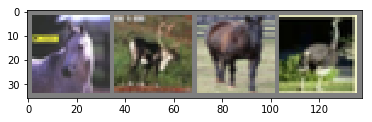

horse deerhorse bird


In [41]:
import matplotlib.pyplot as plt
import numpy as np

#functions to show an image

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()
  
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#show images
imshow(tv.utils.make_grid(images))

# print labels
print(''.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [43]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
model = Net().to(device)

In [45]:
print(model)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

In [0]:
epochs_number = 3

In [48]:
# ======= Train the network =======

for epoch in range(epochs_number):
  
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device) 
    
    #zero the parameter gradients
    optimizer.zero_grad()
    
    #forward + backward + optimize
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    #print statistics
    running_loss = running_loss + loss.item()
    if i % 2000 == 1999:   #print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' %(epoch+1, i+1, running_loss/2000))
      running_loss = 0.0
      

    

[1,  2000] loss: 2.180
[1,  4000] loss: 1.834
[1,  6000] loss: 1.645
[1,  8000] loss: 1.555
[1, 10000] loss: 1.469
[1, 12000] loss: 1.449
[2,  2000] loss: 1.366
[2,  4000] loss: 1.340
[2,  6000] loss: 1.316
[2,  8000] loss: 1.305
[2, 10000] loss: 1.275
[2, 12000] loss: 1.280
[3,  2000] loss: 1.181
[3,  4000] loss: 1.198
[3,  6000] loss: 1.199
[3,  8000] loss: 1.158
[3, 10000] loss: 1.173
[3, 12000] loss: 1.140


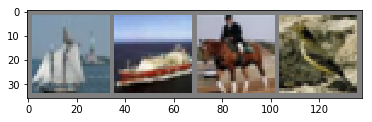

GroundTruth:  ship  ship horse  bird


In [50]:
# ======= Test the network =======

#Display some test images 

testiter = iter(testloader)
images, labels = dataiter.next()

#print images
imshow(tv.utils.make_grid(images))
print('GroundTruth:', ' '.join('%5s' %classes[labels[j]] for j in range(4)))

In [0]:
images = images.to(device)
outputs = model(images)

In [53]:
_, predicted  = torch.max(outputs, 1)

print('Predicted:', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  ship  ship horse  deer


In [54]:
print(outputs)

tensor([[ 0.7552, -1.3013,  0.5071,  0.5465, -1.2466, -0.4464, -1.4938, -0.3953,
          4.4106,  0.3188],
        [ 2.4041,  2.8854, -0.4223, -1.3688, -3.0931, -2.3575, -3.3903, -1.7171,
          5.9973,  2.7182],
        [ 0.0688, -2.7981,  1.3611,  1.8896,  0.0539,  2.4942, -3.1161,  4.3342,
         -3.9656,  0.8368],
        [-0.9776, -2.2979,  1.1961,  1.5624,  2.6262,  1.0608,  1.6322,  0.8277,
         -2.9651, -2.2926]], device='cuda:0', grad_fn=<AddmmBackward>)


In [56]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %
